In [1]:
%pylab inline
import px4tools
import pandas

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 3

Populating the interactive namespace from numpy and matplotlib
attempting to monkey patch pandas timedelta series plotting
monkey patch suceeded


In [2]:
log = px4tools.read_ulog('./ulog/22_03_28.ulg')

In [3]:
pandas.__file__

'/home/jgoppert/anaconda3/lib/python3.5/site-packages/pandas/__init__.py'

In [4]:
pandas.__version__

'0.19.2'

Resample at 0.1 seconds and concatenate all messages into one pandas dataframe. Select time range from 1 sec to 59 sec.

In [5]:
m = log.concat(dt=0.1)['1 s': '59 s']

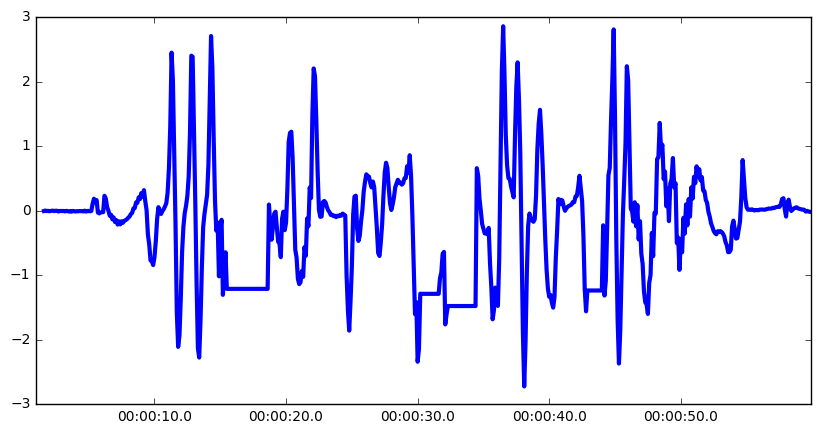

In [6]:
m.t_vehicle_attitude_0__f_pitchspeed.plot()

A list of all of the available topis can be found using keys().

In [7]:
m.keys()

Index(['timestamp', 't_vehicle_gps_position_0__f_time_utc_usec',
       't_vehicle_gps_position_0__f_lat', 't_vehicle_gps_position_0__f_lon',
       't_vehicle_gps_position_0__f_alt',
       't_vehicle_gps_position_0__f_alt_ellipsoid',
       't_vehicle_gps_position_0__f_s_variance_m_s',
       't_vehicle_gps_position_0__f_c_variance_rad',
       't_vehicle_gps_position_0__f_eph', 't_vehicle_gps_position_0__f_epv',
       ...
       't_vehicle_attitude_setpoint_0__f_yaw_reset_integral',
       't_vehicle_attitude_setpoint_0__f_fw_control_yaw',
       't_vehicle_attitude_setpoint_0__f_disable_mc_yaw_control',
       't_vehicle_attitude_setpoint_0__f_apply_flaps',
       't_vtol_vehicle_status_0__f_airspeed_tot',
       't_vtol_vehicle_status_0__f_vtol_in_rw_mode',
       't_vtol_vehicle_status_0__f_vtol_in_trans_mode',
       't_vtol_vehicle_status_0__f_in_transition_to_fw',
       't_vtol_vehicle_status_0__f_vtol_transition_failsafe',
       't_vtol_vehicle_status_0__f_fw_permanent_sta

Autocomplete works as if it were a class member and you can plot using the member function of the pandas series.

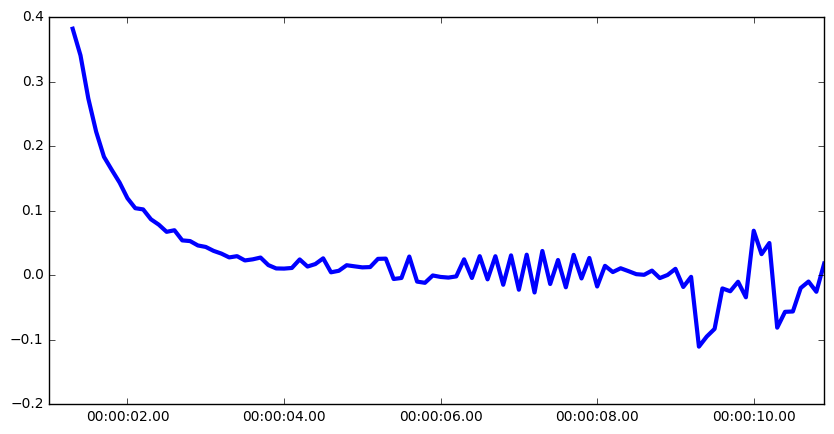

In [8]:
m.t_actuator_controls_0_0__f_control_0_['1 s':'10 s'].plot()

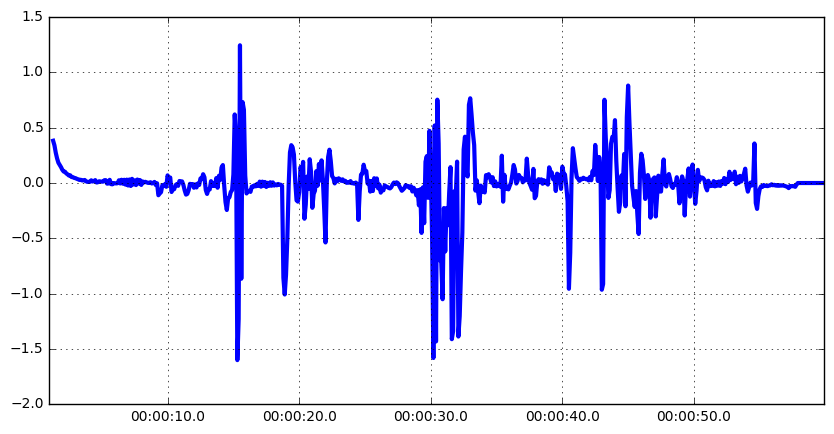

In [9]:
m.t_actuator_controls_0_0__f_control_0_.plot()
plt.grid()

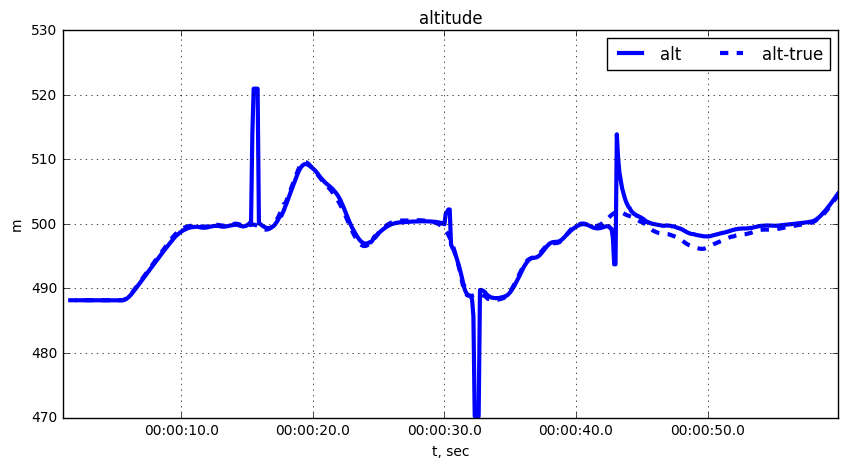

In [10]:
px4tools.ulog.plot_altitude(m, True)


ESTIMATOR ANALYSIS
-----------------------------------
mean euler error:
	  1.705576	 deg
	 -1.101504	 deg
	  5.251815	 deg

standard deviation euler error:
	 17.356840	 deg
	 24.108777	 deg
	 31.642797	 deg



{'pitch_error_mean': -1.1015037476511884,
 'pitch_error_std': 24.108777338887972,
 'roll_error_mean': 1.70557557792603,
 'roll_error_std': 17.356840143135315,
 'yaw_error_mean': 5.2518154387082072,
 'yaw_error_std': 31.642796600872622}

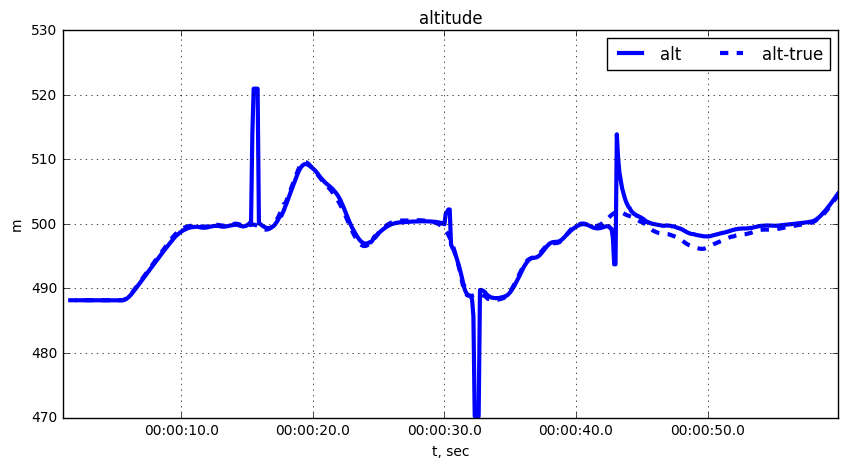

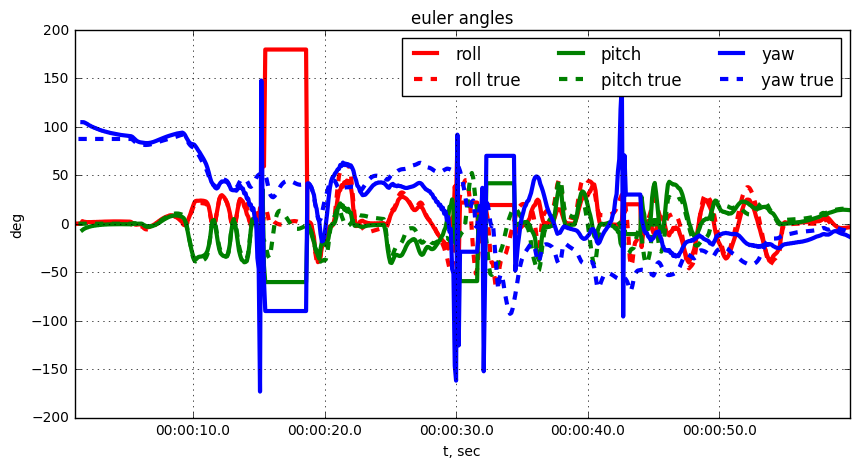

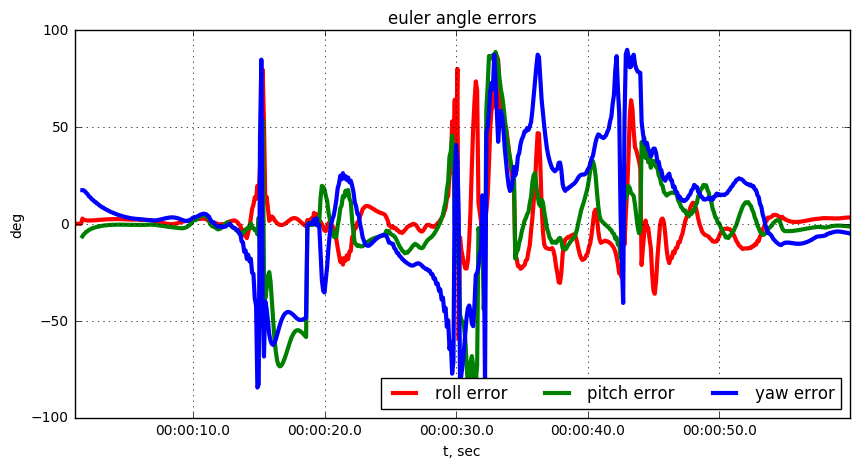

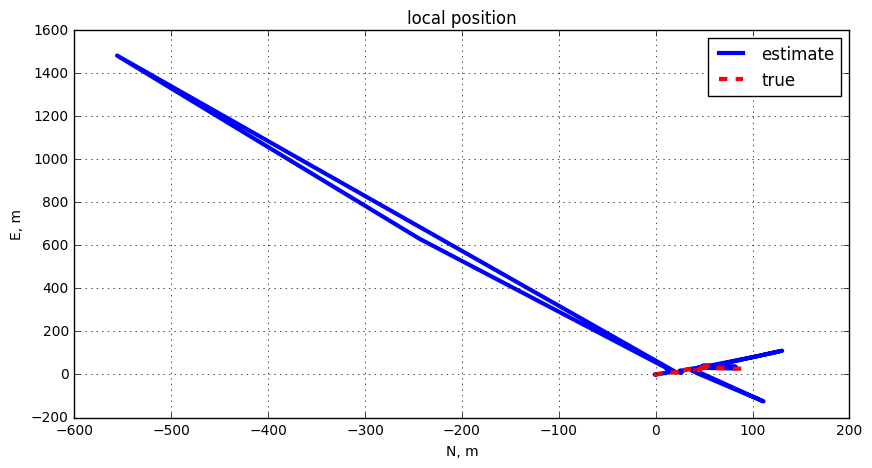

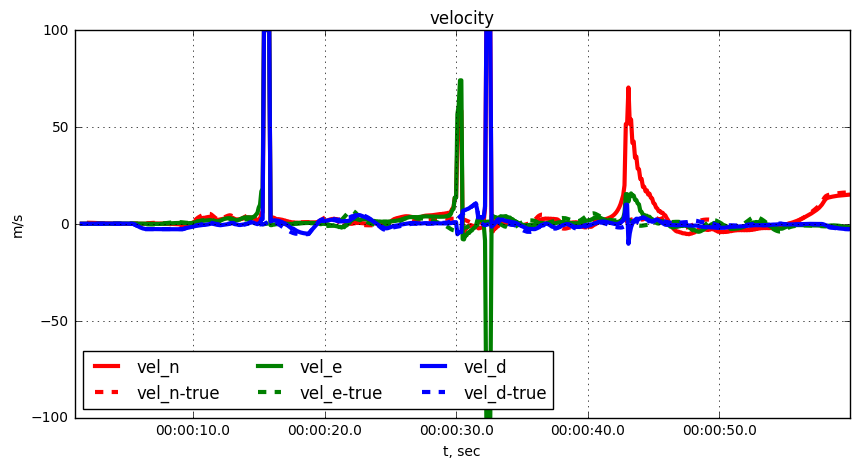

In [12]:
m = px4tools.compute_data(m)
px4tools.ulog.estimator_analysis(m)